In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%run Data_manipulation.ipynb

# Loading data

In [2]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
scaled_data_NIFTY, scaler_NIFTY = scale_data(NIFTY)
df_residuals_NIFTY, df_trend_NIFTY, df_seasonal_NIFTY, decomposition_results_NIFTY = transform_to_stationary(scaled_data_NIFTY)
NIFTY.set_index('Date', inplace=True)
scaled_data_NIFTY.set_index('Date', inplace=True)

In [3]:
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')
scaled_data_IBOV, scaler_IBOV = scale_data(IBOV)
df_residuals_IBOV, df_trend_IBOV, df_seasonal_IBOV, decomposition_results_IBOV = transform_to_stationary(scaled_data_IBOV)
IBOV.set_index('Date', inplace=True)
scaled_data_IBOV.set_index('Date', inplace=True)

In [4]:
# Align the data by merging on the date index
aligned_data = pd.merge(NIFTY['Close'], IBOV['Close'], left_index=True, right_index=True, suffixes=('_NIFTY', '_IBOV'))
aligned_data.head()

,Close_NIFTY,Close_IBOV
Date,,
2000-01-03,1592.2,16930.0
2000-01-04,1638.7,15851.0
2000-01-05,1595.8,16245.0
2000-01-06,1617.6,16107.0
2000-01-07,1613.3,16309.0


In [5]:
# Align the data by merging on the date index
scaled_aligned_data = pd.merge(scaled_data_NIFTY['Close'], scaled_data_IBOV['Close'], left_index=True, right_index=True, suffixes=('_NIFTY', '_IBOV'))
scaled_aligned_data.head()

,Close_NIFTY,Close_IBOV
Date,,
2000-01-03,0.033373,0.068024
2000-01-04,0.035476,0.059449
2000-01-05,0.033536,0.062580
2000-01-06,0.034522,0.061483
2000-01-07,0.034328,0.063089


<Axes: xlabel='Date'>

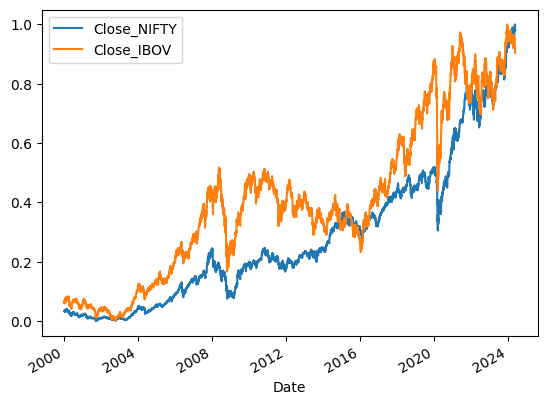

In [14]:
scaled_aligned_data.plot()

# Johansen Cointegration test

In [10]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Perform Johansen cointegration test
# aligned_data should be a DataFrame with 'Close_NIFTY' and 'Close_IBOV' columns
result = coint_johansen(aligned_data[['Close_NIFTY', 'Close_IBOV']], det_order=0, k_ar_diff=1)

# Extract eigenvalues and critical values
eigenvalues = result.eig
crit_values = result.cvt

# Print results
print("Eigenvalues:", eigenvalues)
print("Critical Values (90%, 95%, 99%):", crit_values)

# Interpretation
# Compare test statistics with critical values to determine cointegration
significance_levels = [90, 95, 99]

for i, eigenvalue in enumerate(eigenvalues):
    print(f"\nEigenvalue {i+1}: {eigenvalue:.8f}")
    for j, crit_value in enumerate(crit_values[i]):
        significance = significance_levels[j]
        print(f"  {significance}% Critical Value: {crit_value:.4f}")
        if eigenvalue > crit_value:
            print(f"  -> Series are cointegrated at the {significance}% level.")
        else:
            print(f"  -> Series are not cointegrated at the {significance}% level.")


Eigenvalues: [0.00184396 0.00020088]
Critical Values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigenvalue 1: 0.00184396
  90% Critical Value: 13.4294
  -> Series are not cointegrated at the 90% level.
  95% Critical Value: 15.4943
  -> Series are not cointegrated at the 95% level.
  99% Critical Value: 19.9349
  -> Series are not cointegrated at the 99% level.

Eigenvalue 2: 0.00020088
  90% Critical Value: 2.7055
  -> Series are not cointegrated at the 90% level.
  95% Critical Value: 3.8415
  -> Series are not cointegrated at the 95% level.
  99% Critical Value: 6.6349
  -> Series are not cointegrated at the 99% level.


# Cointegration test by Year

In [13]:
# Group the data by year and perform the Johansen cointegration test for each year
for year, yearly_data in aligned_data.groupby(aligned_data.index.year):
    # Perform Johansen cointegration test
    result = coint_johansen(yearly_data[['Close_NIFTY', 'Close_IBOV']], det_order=0, k_ar_diff=1)

    # Extract eigenvalues and critical values
    eigenvalues = result.eig
    crit_values = result.cvt

    # Check for cointegration at any significance level
    no_cointegration = True
    significance_levels = [90, 95, 99]

    for i, eigenvalue in enumerate(eigenvalues):
        for j, crit_value in enumerate(crit_values[i]):
            if eigenvalue > crit_value:
                no_cointegration = False
                break
        if not no_cointegration:
            break

    # Print only if there is no cointegration at this year
    if no_cointegration:
        print(f"No cointegration found in {year}.")

No cointegration found in 2000.
No cointegration found in 2001.
No cointegration found in 2002.
No cointegration found in 2003.
No cointegration found in 2004.
No cointegration found in 2005.
No cointegration found in 2006.
No cointegration found in 2007.
No cointegration found in 2008.
No cointegration found in 2009.
No cointegration found in 2010.
No cointegration found in 2011.
No cointegration found in 2012.
No cointegration found in 2013.
No cointegration found in 2014.
No cointegration found in 2015.
No cointegration found in 2016.
No cointegration found in 2017.
No cointegration found in 2018.
No cointegration found in 2019.
No cointegration found in 2020.
No cointegration found in 2021.
No cointegration found in 2022.
No cointegration found in 2023.
No cointegration found in 2024.


## *We can observe that the indices are not cointegrated even at the 90% critical value*

In [7]:
import pandas as pd

# Calculate Pearson correlation
pearson_corr = aligned_data[['Close_NIFTY', 'Close_IBOV']].corr().iloc[0, 1]
print(f'Pearson Correlation: {pearson_corr}')

# Calculate Spearman correlation
spearman_corr = aligned_data[['Close_NIFTY', 'Close_IBOV']].corr(method='spearman').iloc[0, 1]
print(f'Spearman Correlation: {spearman_corr}')


Pearson Correlation: 0.9333857542045765
Spearman Correlation: 0.9207468329099041


### *There is presence of strong positive correlation between NIFTY and IBOV, the lack of cointegration indicates there is no long-term equilibrium relationship between the two indices. This means that while they may move together in the short term, they do not share a stable long-term connection. As a result, their relationship could diverge over time, and relying on their correlation alone might be misleading for long-term predictions or strategies.*









### *Pearson Correlation - linear relationship and Spearman Correlation - Monotonic relationship*